In [168]:
import pandas as pd
import webcolors
import numpy as nump
import scipy as sci
import random
import matplotlib
import matplotlib.pyplot as m
#from math import inf
m.style.use('ggplot')
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sci', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
#category = 'Science' #must be in ['Arts', 'Business', 'Computers', 'Games', 'Health', 'Home', 'Kids_and_Teens', 'News', 'Recreastion', 'Reference', 'Regional', 'Science', 'Shopping', 'Society', 'Sports']

df = pd.read_csv('ParsedWebsitesCleanSample.csv')
df = df.dropna().drop([df.columns[0], 'fonts', 'website', 'text'], axis = 1)
#df = df[df['category'].str.contains(category)]
df['colors'] = df['colors'].replace({' ': ', '}, regex=True)
df['colors'] = df['colors'].str.split(',').str[0]
df['colors'] = df['colors'].replace({'[^0-9a-zA-Z#]': ''}, regex=True)
df['rgb_colors'] = df['colors'].apply(webcolors.hex_to_rgb)
df

,category,colors,rgb_colors
0,/Recreation/Motorcycles/Classic,#337ab7,"(51, 122, 183)"
1,/Science/Instruments_and_Supplies/Laboratory_C...,#f2f2f2,"(242, 242, 242)"
2,/Shopping/Auctions/Beverages,#ffffff,"(255, 255, 255)"
3,/Science/Earth_Sciences/Geomatics,#f5f5f5,"(245, 245, 245)"
4,/Science/Environment/Biodiversity,#3b312f,"(59, 49, 47)"
...,...,...,...
3532,/Science/Environment/Organizations,#004054,"(0, 64, 84)"
3533,/Science/Biology/Methods_and_Techniques,#818a91,"(129, 138, 145)"
3534,/News/Alternative/Odd_News,#f9f9f9,"(249, 249, 249)"
3535,/Science/Environment/Products_and_Services,#474c55,"(71, 76, 85)"


In [146]:
def grabColorIfPossible(hexcolor, n):
    try:
        hexcolor = webcolors.hex_to_rgb(eval(hexcolor)[n][0])
    except :
        hexcolor = ''
    return hexcolor

In [148]:
#category = 'Science' #must be in ['Arts', 'Business', 'Computers', 'Games', 'Health', 'Home', 'Kids_and_Teens', 'News', 'Recreastion', 'Reference', 'Regional', 'Science', 'Shopping', 'Society', 'Sports']

df = pd.read_csv('ParsedWebsitesCleanSample.csv')
df = df.dropna().drop([df.columns[0], 'fonts', 'website', 'text'], axis = 1)
#df = df[df['category'].str.contains(category)]
df['colors'] = df['colors'].replace({' ': ', '}, regex=True)
df['rgb_colors1'] = df['colors'].apply(grabColorIfPossible, n=0)

df['rgb_colors2'] = df['colors'].apply(grabColorIfPossible, n=1)


df['rgb_colors3'] = df['colors'].apply(grabColorIfPossible, n=2)

df

,category,colors,rgb_colors1,rgb_colors2,rgb_colors3
0,/Recreation/Motorcycles/Classic,"[['#337ab7', 7]\r\n, ['#f5f5f5', 6]\r\n, [', #...","(51, 122, 183)","(245, 245, 245)",
1,/Science/Instruments_and_Supplies/Laboratory_C...,"[['#f2f2f2', 1]]","(242, 242, 242)",,
2,/Shopping/Auctions/Beverages,"[['#ffffff', 26]\r\r\n, ['#f5f5f5', 16]\r\r\n,...","(255, 255, 255)","(245, 245, 245)","(255, 120, 40)"
3,/Science/Earth_Sciences/Geomatics,"[['#f5f5f5', 10]\r\n, ['#34495e', 7]\r\n, ['#1...","(245, 245, 245)","(52, 73, 94)","(26, 188, 156)"
4,/Science/Environment/Biodiversity,"[['#3b312f', 17]\r\r\n, ['#acc2b6', 14]\r\r\n,...","(59, 49, 47)","(172, 194, 182)","(59, 49, 47)"
...,...,...,...,...,...
3532,/Science/Environment/Organizations,"[['#004054', 18]\r\r\n, ['#7ea3d1', 16]\r\r\n,...","(0, 64, 84)","(126, 163, 209)","(244, 170, 0)"
3533,/Science/Biology/Methods_and_Techniques,"[['#818a91', 5]\r\n, ['#6ec1e4', 4]\r\n, [', #...","(129, 138, 145)","(110, 193, 228)",
3534,/News/Alternative/Odd_News,"[['#f9f9f9', 3]\r\r\n, ['#181818', 1]\r\r\n, [...","(249, 249, 249)","(24, 24, 24)","(50, 55, 60)"
3535,/Science/Environment/Products_and_Services,"[['#474c55', 17]\r\r\n, ['#efb20e', 11]\r\r\n,...","(71, 76, 85)","(239, 178, 14)","(52, 58, 64)"


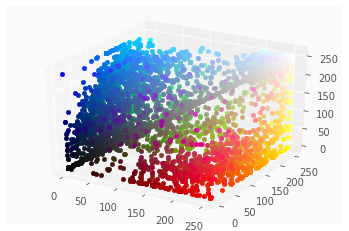

In [175]:
fig = plt.figure()

ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlim(0, 255)
ax1.set_ylim(0, 255)
ax1.set_zlim(0, 255)
ax1.set_facecolor('#fafafa')

for n in range(1,4):
    for i in range(0,len(df)):
        rgb_tuple = df.iloc[i]['rgb_colors' + str(n)]
        if rgb_tuple:
            hex_value = webcolors.rgb_to_hex(rgb_tuple)
            ax1.scatter(rgb_tuple[0], rgb_tuple[1], rgb_tuple[2], c=hex_value, marker='o')
plt.autoscale()
    #Test